In [2]:
import numpy as np

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import matplotlib.font_manager as fm

font_name = fm.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family = font_name)
mpl.rcParams['axes.unicode_minus'] = False

# 서울시 구별 CCTV 현황 분석
    - http://opengov.seoul.go.kr
    - http://stat.seoul.go.kr

---
## 1. 데이터 수집

In [24]:
# cctv 자료 불러오기

cctv_seoul = pd.read_csv("data/analysisttest/cctv.csv")
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [43]:
# 인구 자료 불러오기

pop_seoul = pd.read_excel("data/analysisttest/Report.xls", header=2, usecols="B, D, G, J, N")  # 엑셀 파일에서 원하는 열만 선택하여 불러올 수 있다(3번째 행의 B D G J N열 불러오기)
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


In [25]:
# 불러온 cctv 자료에서 기관명이라는 컬럼명을 구별로 변경 (pandas.rename())

cctv_seoul.rename(columns={"기관명":"구별"}, inplace=True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [44]:
# 불러온 인구 자료에서 컬럼명을 "구별, 입구수, 한국인, 외국인, 고령자"로 변경

pop_seoul.rename(columns={"자치구":"구별", "계":"인구수", "계.1":"한국인", "계.2":"외국인", "65세이상고령자":"고령자"}, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


## 2. 탐색적 데이터 분석

In [28]:
# 어느 구가 가장 cctv가 많이 설치되었는지 확인

cctv_seoul.sort_values(by="소계", ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [33]:
# cctv 설치 증가율 확인. 증가율 = ((2014년도+2015년+2016년)/2013년도 이전)*100 구한 뒤 최근 증가율 컬럼 추가

cctv_seoul["최근 증가율"] = (cctv_seoul["2014년"]+cctv_seoul["2015년"]+cctv_seoul["2016년"])/cctv_seoul["2013년도 이전"]*100
cctv_seoul.sort_values(by="최근 증가율", ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [45]:
# 인구 대비 cctv 설치 현황

# 1. 인구 데이터에서 필요없는 첫번째 행 삭제
pop_seoul.drop([0], inplace=True)  # drop() : 행 기준 데이터 삭제. inplace 옵션 통해 원본에 반영
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470


In [46]:
# 2. 구별 데이터 확인(중복 제거하고 출력)
pop_seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [50]:
# 3. NaN 값 있을 경우, 위치 확인하여 해당 행 삭제
pop_seoul[pop_seoul["구별"].isnull()]  # innull() 통해 NaN값 위치 확인
pop_seoul.drop([26], inplace=True)

In [51]:
pop_seoul["구별"].unique()  # 삭제 확인

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [56]:
# 4. 어느 구가 가장 인구수가 적고 많은지 확인
pop_seoul.sort_values(by="인구수", ascending=False)  # 송파구 인구수가 가장 많다
pop_seoul.sort_values(by="인구수", ascending=True).head()  # 중구 인구수가 가장 적다


,구별,인구수,한국인,외국인,고령자
2,중구,135139,126082,9057,21655
1,종로구,164348,154549,9799,26429
3,용산구,245411,229909,15502,37238
18,금천구,253344,234238,19106,34640
4,성동구,314551,306532,8019,41752


In [65]:
# 5. 외국인 비율과 고령자 비율 컬럼 추가
pop_seoul["외국인 비율"] = pop_seoul["외국인"]/pop_seoul["인구수"]*100
pop_seoul["고령자 비율"] = pop_seoul["고령자"]/pop_seoul["인구수"]*100
pop_seoul

pop_seoul.sort_values(by="외국인 비율", ascending=False)  # 영등포구가 외국인 비율 가장 높다 / 도봉구가 가장 낮다
pop_seoul.sort_values(by="고령자 비율", ascending=False).head()  # 강북구가 고령자 비율 가장 높다 / 송파구가 가장 낮다

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
9,강북구,327511,323862,3649,57002,1.114161,17.404606
1,종로구,164348,154549,9799,26429,5.962348,16.081121
2,중구,135139,126082,9057,21655,6.701988,16.024242
10,도봉구,345041,342861,2180,54293,0.631809,15.735231
6,동대문구,364962,349308,15654,56284,4.289214,15.421880


In [77]:
# 6. cctv 데이터와 인구 데이터 합치고 분석
data_result = pd.merge(cctv_seoul, pop_seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,3238,1292,430,584,932,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,379,99,155,377,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,369,120,138,204,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,388,258,184,81,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,846,260,390,613,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [78]:
# 7. 필요 없는 컬럼 제거 : drop(행 기준), del(열 기준)
del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]

data_result.head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [79]:
# 8. "구별" 컬럼을 인덱스로 설정
data_result.set_index("구별", inplace=True)  # 기준이 되는 구별 컬럼을 set_index() 통해 인덱스로 설정. inplace 옵션 통해 원본 반영
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [81]:
# 9. 소계vs인구수, 소계vs외국인비율, 소계vs고령자비율 간의 상관관계 분석
print(np.corrcoef(data_result["소계"], data_result["인구수"]))  # np.corrcoef() : 상관 관계 분석 위한 메서드. -1 ~ 1(0에 가까울수록 관계 적다)
print(np.corrcoef(data_result["소계"], data_result["외국인 비율"]))
print(np.corrcoef(data_result["소계"], data_result["고령자 비율"]))

[[1.         0.23037183]
 [0.23037183 1.        ]]
[[ 1.         -0.04656978]
 [-0.04656978  1.        ]]
[[ 1.         -0.26783452]
 [-0.26783452  1.        ]]


In [85]:
# CCTV 설치 현황과 인구 데이터의 관계

print(data_result.sort_values(by="소계", ascending=False).head())  # 강남구가 cctv 가장 많다
data_result.sort_values(by="인구수", ascending=False).head()  # 송파구가 인구 가장 많다. 강남구는 3순위

       소계      최근 증가율     인구수     한국인    외국인    고령자    외국인 비율     고령자 비율
구별                                                                      
강남구  3238  150.619195  557865  552976   4889  65859  0.876377  11.805544
양천구  2482   34.671731  473087  469221   3866  56070  0.817186  11.851943
서초구  2297   63.371266  445164  440954   4210  54055  0.945719  12.142716
관악구  2109  149.290780  522292  504445  17847  70807  3.417054  13.556976
은평구  2108   85.237258  490253  485902   4351  75535  0.887501  15.407351


,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
송파구,1081,104.347826,671994,665282,6712,77978,0.998818,11.603973
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


## 3. 시각화

### 1) CCTV 현황 데이터로 그래프 분석

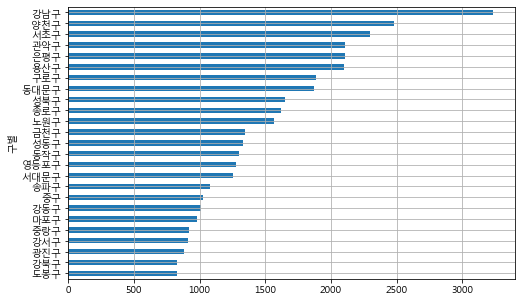

In [91]:
# CCTV 가 많이 설치된 구별로 그래프 그리기(막대 그래프)

data_result["소계"].sort_values().plot(kind="barh", figsize=(8, 5), grid=True)  # 옵션 kind=그래프 형태, figsize=그래프 사이즈, grid=눈금

In [93]:
# 인구수 대비 cctv 설치 비율 (소계/인구수*100)

data_result["인구수 대비 cctv 비율"] = data_result["소계"]/data_result["인구수"]*100
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,인구수 대비 cctv 비율
구별,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138,0.230475
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606,0.253732
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976,0.403797


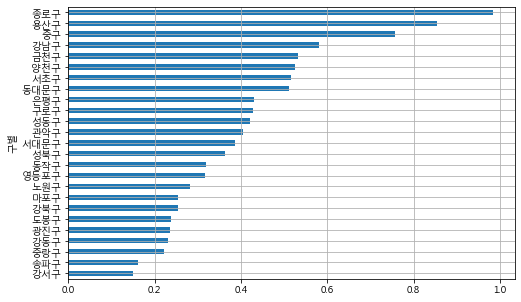

In [95]:
data_result["인구수 대비 cctv 비율"].sort_values().plot(kind="barh", figsize=(8, 5), grid=True)

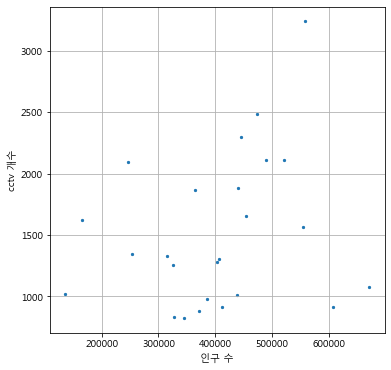

In [99]:
# 소계와 인구 수의 관계를 산포도로 확인

plt.figure(figsize=(6, 6))
plt.scatter(data_result["인구수"], data_result["소계"], s=5)  # 인구수 대비 cctv 소계(인구수를 x좌표로)

plt.xlabel("인구 수")
plt.ylabel("cctv 개수")
plt.grid()  # 눈금 추가

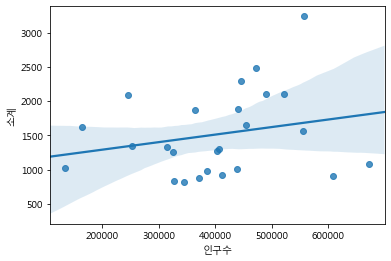

In [101]:
sns.regplot(x="인구수", y="소계", data=data_result)

In [105]:
# poly1d : 방정식으로 만들어 넘기는 함수
a = np.poly1d([1, 2])  # 1차 방정식
print(a)

b = np.poly1d([1, 2, 3])  # 2차 방정식
print(b)

 
1 x + 2
   2
1 x + 2 x + 3


[1.10432363e-03 1.06864009e+03]
 
0.001104 x + 1069


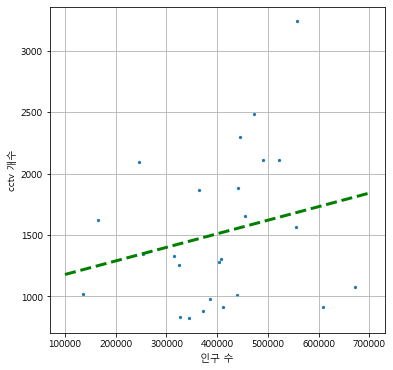

In [109]:
# 회귀선 작성 (y = ax + b)

fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)  # 모든 점과의 거리가 가장 짧은 최적의 회귀선 찾는다(1차원 직선값을 구한다). 기울기(a)와 절편(b) 값을 순서대로 구해준다
print(fp1)

f1 = np.poly1d(fp1)  # poly1d : 방정식으로 만들어서 넘기는 함수. y좌표
print(f1)

fx = np.linspace(100000, 700000, 100)  # x좌표 구함. 인구수 100000~700000까지 100명 단위로 표시

plt.figure(figsize=(6, 6))
plt.scatter(data_result["인구수"], data_result["소계"], s=5)
plt.plot(fx, f1(fx), lw=3, color="green", ls="dashed")  # (x좌표, y좌표(직선값), lw=선 굵기, color=선 색상, ls=선 스타일)

plt.xlabel("인구 수")
plt.ylabel("cctv 개수")

plt.grid()  # 눈금 추가

In [115]:
# 각 데이터의 오차(이상치) 구해서 구 이름 출력

data_result["오차"] = np.abs(data_result["소계"] - f1(data_result["인구수"]))  # np.abs() : 절대값 함수

df_sort = data_result.sort_values(by="오차", ascending = False)
df_sort.head()  # 강남구가 오차 가장 크고, 금천구가 가장 작다

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,인구수 대비 cctv 비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
양천구,2482,34.671731,473087,469221,3866,56070,0.817186,11.851943,0.524639,890.918761
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747,829.467513
용산구,2096,53.216374,245411,229909,15502,37238,6.316750,15.173729,0.854077,756.346747
서초구,2297,63.371266,445164,440954,4210,54055,0.945719,12.142716,0.515990,736.754790


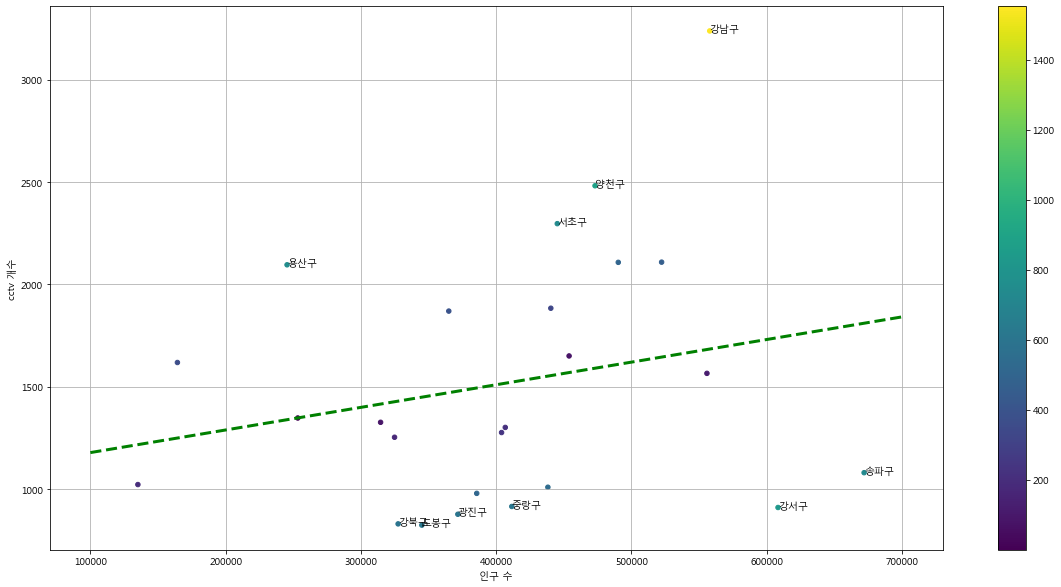

In [121]:
plt.figure(figsize=(20, 10))
plt.scatter(data_result["인구수"], data_result["소계"], s=20, c=data_result["오차"])  # 오차값에 따른 색상 부여
plt.plot(fx, f1(fx), lw=3, color="green", ls="dashed") 

plt.xlabel("인구 수")
plt.ylabel("cctv 개수")

plt.grid() 

plt.colorbar()  # 색상 기준 표시

for n in range(10):
    plt.text(df_sort["인구수"][n], df_sort["소계"][n], df_sort.index[n], fontsize=10)  # 그래프 위에 오차값 가장 큰 구 표시

In [122]:
# 지금까지의 작업 파일로 저장

df_sort.to_csv("data/analysisttest/cctv_result.csv", sep=",", encoding="utf-8") 